<a href="https://colab.research.google.com/github/jnlinao/NLP/blob/main/Wk2_Bag_of_Words_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import packages
Make sure you installed ***sklearn***, ***matplotlib*** and ***numpy*** if you use your local machine

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

## Prepare dataset
The 20 newsgroups text dataset: [Details](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html)

In [ ]:
dataset = sklearn.datasets.fetch_20newsgroups()

### See some examples and classes

In [ ]:
print(dataset.data[0])
print(dataset.data[1])
print(dataset.data[3])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.wa

In [ ]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

## Count Vectorizer
Convert a list of text documents to a matrix of token (word) frequencies ([Details](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html))

Example

In [ ]:
example_docs=[
       "One Cent, Two Cents, Old Cent, New Cent: All About Money (Cat in the Hat's Learning Library",
       "Inside Your Outside: All About the Human Body (Cat in the Hat's Learning Library)",
       "Oh, The Things You Can Do That Are Good for You: All About Staying Healthy (Cat in the Hat's Learning Library)",
       "On Beyond Bugs: All About Insects (Cat in the Hat's Learning Library)",
       "There's No Place Like Space: All About Our Solar System (Cat in the Hat's Learning Library)" 
      ]

In [ ]:
#Create the transform
vectorizer = CountVectorizer()

#Tokenize and build vocab
vectorizer.fit(example_docs)

CountVectorizer()

In [ ]:
#Summarize
print(vectorizer.vocabulary_)

{'one': 28, 'cent': 8, 'two': 40, 'cents': 9, 'old': 26, 'new': 23, 'all': 1, 'about': 0, 'money': 22, 'cat': 7, 'in': 16, 'the': 37, 'hat': 13, 'learning': 19, 'library': 20, 'inside': 18, 'your': 42, 'outside': 30, 'human': 15, 'body': 4, 'oh': 25, 'things': 39, 'you': 41, 'can': 6, 'do': 10, 'that': 36, 'are': 2, 'good': 12, 'for': 11, 'staying': 34, 'healthy': 14, 'on': 27, 'beyond': 3, 'bugs': 5, 'insects': 17, 'there': 38, 'no': 24, 'place': 31, 'like': 21, 'space': 33, 'our': 29, 'solar': 32, 'system': 35}


In [ ]:
### Create vector representation of documents

In [ ]:
X = vectorizer.transform(example_docs)
print(X.toarray())

[[1 1 0 0 0 0 0 1 3 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0
  0 1 0 0 1 0 0]
 [1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 2 0 0 0 0 1]
 [1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
  1 2 0 1 0 2 0]
 [1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0]
 [1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1
  0 1 1 0 0 0 0]]


In [ ]:
## Plot Histogram

In [ ]:
sum_mat = np.sum(X, axis=0)
freqs = np.sort(sum_mat).T[::-1]
plt.plot(list(range(1, sum_mat.shape[1] + 1)), freqs)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.loglog(list(range(1, sum_mat.shape[1] + 1)), freqs)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

## Count Vectorizer
- load a scikit-learn dataset (20 newsgroups)
- run count vectorizer on it
- plot histograms of counts etc.
- vary the parameters of Cvectorizer, show how histograms change

### Split into train and test datasets
Here, 70% of the original data are used for training models, and the rest are for test

In [ ]:
class Dataset:
  def __init__(self, dataset, start_idx, end_idx):
    self.data = dataset.data[start_idx:end_idx]
    self.labels = dataset.target[start_idx:end_idx]
    self.vecs = None

    
def split_dataset(dataset, train_rate=0.7):
  data_size = len(dataset.data)
  train_last_idx = int(train_rate * data_size)
  train = Dataset(dataset, 0, train_last_idx)
  test = Dataset(dataset, train_last_idx, data_size)
  return train, test

In [ ]:
train, test = split_dataset(dataset)
print('train data size:', len(train.data))
print('test data size:', len(test.data))

train data size: 7919
test data size: 3395


### Create the vector representation of training and testing data

In [ ]:
#Encode documents
vectorizer = CountVectorizer(max_features=2000, max_df=0.7, min_df=20)
vectorizer.fit(train.data)
train.vecs = vectorizer.transform(train.data)
test.vecs = vectorizer.transform(test.data)

### Convert word to index and vice versa

In [ ]:
def word2idx(word, vocab_dict):
  index = vocab_dict[word] if word in vocab_dict.keys() else 'Not Found'
  print(word, ' -> ', index)


def idx2word(index, vocabs):
  word = vocabs[index] if 0 <= index < len(vocabs) else 'Not Found'
  print(index, ' -> ', word)

In [ ]:
vocab_dict = vectorizer.vocabulary_
vocabs = vectorizer.get_feature_names()

word2idx('display', vocab_dict)
idx2word(4926, vocabs)

word2idx('google', vocab_dict)
idx2word(1, vocabs)

display  ->  581
4926  ->  Not Found
google  ->  Not Found
1  ->  000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### See vocaburary size

In [ ]:
print('Vocaburary Size:', len(vocab_dict))

Vocaburary Size: 2000


In [ ]:
def sentence2vec(sentence, vectorizer):
  vec = vectorizer.transform([sentence])
  vocabs = vectorizer.get_feature_names()
  print('\"', sentence, '\" -> ')
  print(vec)
  for idx in vec.indices:
    print(idx, vocabs[idx])

In [ ]:
sentence2vec('A fair fair number of brave', vectorizer)

" A fair fair number of brave " -> 
  (0, 697)	2
  (0, 1252)	1
697 fair
1252 number


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
word2idx('anteaters', vocab_dict)

anteaters  ->  Not Found


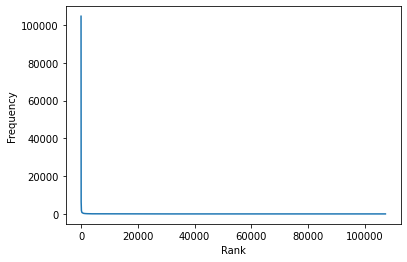

In [ ]:
sum_mat = np.sum(train.vecs, axis=0)
freqs = np.sort(sum_mat).T[::-1]
plt.plot(list(range(1, sum_mat.shape[1] + 1)), freqs)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

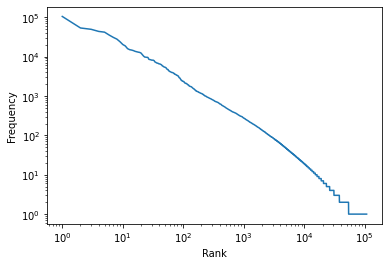

In [ ]:
plt.loglog(list(range(1, sum_mat.shape[1] + 1)), freqs)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

### Play with Vectorizer parameters
Back to CountVectorizer() to try other values for the parameters.



## Classification

- train and predict on train+test data
- compute different metrics (train and test)
- contigency table
- compute PR curve
- change parameters of CVectorizer, see how metrics/curves change
- change parameters of classifier (like regularization), see how metrics/curves change.. like overfitting

In [ ]:
def evaluate(preds, labels, print_details=True):
  f1 = f1_score(labels, preds, average='micro')
  if print_details:
    print('Precision:', precision_score(labels, preds, average=None))  #Computes precision
    print('Recall:', recall_score(labels, preds, average=None))        #Computes recall
    print('F1 score:', f1_score(labels, preds, average=None))          #Computes f1_score
  print('Avg. F1 score:', f1)
  
  
def plot_confusion_matrix(preds, labels, class_size):
  cnf_mat = confusion_matrix(labels, preds)                            #Computes confusion_matrix
  cnf_mat = cnf_mat.astype('float') / cnf_mat.sum(axis=1)[:, np.newaxis]
  plt.imshow(cnf_mat, interpolation='nearest', cmap=plt.cm.Blues)
  plt.xticks(np.arange(class_size), np.arange(1, class_size + 1))
  plt.yticks(np.arange(class_size), np.arange(1, class_size + 1))
  plt.xlabel('True Label')
  plt.ylabel('Predicted Label')
  plt.title('Confusion Matrix')
  plt.colorbar()
  plt.show()
  
  
def plot_pr_curves(probs, labels, class_size):
  for i in range(class_size):
    p,r,threshs = precision_recall_curve(labels==i, probs[:,i])
    plt.plot(r, p, label=dataset.target_names[i])
  plt.show()

In [ ]:
def training(model, train, class_size, print_details=True):
  model.fit(train.vecs, train.labels)
  train_preds = model.predict(train.vecs)
  if print_details:
    dev_probs = model.predict_proba(train.vecs)
    plot_pr_curves(dev_probs, train.labels, class_size)
  evaluate(train_preds, train.labels, print_details)
  

def testing(model, test, class_size, print_details=True):
  test_preds = model.predict(test.vecs)
  if print_details:
    test_probs = model.predict_proba(test.vecs)
    plot_pr_curves(test_probs, test.labels, class_size)
  evaluate(test_preds, test.labels, print_details)
  plot_confusion_matrix(test_preds, test.labels, class_size)

### Logistic Regression

In [ ]:
model = LogisticRegression(C=0.1)
training(model, train, len(dataset.target_names), print_details=False)

Avg. F1 score: 0.9834575072610178


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


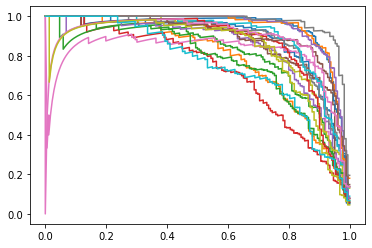

Precision: [0.83783784 0.69398907 0.71428571 0.67307692 0.75       0.78313253
 0.75384615 0.81122449 0.83233533 0.79428571 0.87765957 0.91812865
 0.68888889 0.83333333 0.91623037 0.78846154 0.85714286 0.92814371
 0.87022901 0.76923077]
Recall: [0.83221477 0.74269006 0.75418994 0.62130178 0.76875    0.79754601
 0.83522727 0.83684211 0.8128655  0.81764706 0.87765957 0.88202247
 0.72941176 0.81395349 0.87939698 0.91111111 0.83636364 0.91715976
 0.74025974 0.57377049]
F1 score: [0.83501684 0.71751412 0.73369565 0.64615385 0.75925926 0.79027356
 0.79245283 0.8238342  0.82248521 0.8057971  0.87765957 0.89971347
 0.70857143 0.82352941 0.8974359  0.84536082 0.84662577 0.92261905
 0.8        0.657277  ]
Avg. F1 score: 0.8041237113402062


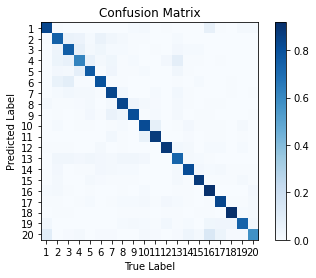

In [ ]:
testing(model, test, len(dataset.target_names))

#### Let's tune vectorizer's parameters
Details are given [here](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)  
e.g.
```
vectorizer = CountVectorizer(min_df=20) # min_df=1 by default
```


#### Let's tune regularization parameter
Details are given [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)  
e.g.
```
model = LogisticRegression(C=0.1) # C=1.0 by default
```


## Compare multiple classifiers

- We use NB, SVM and RF
- See the performance with the default parameters  
- Compare it with those with tuned parameters
- Which model performs best in this problem?

### Naive Bayes
Multinomial Naive Bayes with a smoothing parameter (*alpha*)

In [ ]:
model = MultinomialNB()
training(model, train, len(dataset.target_names), False)

Avg. F1 score: 0.812855158479606


In [ ]:
testing(model, test, len(dataset.target_names), False)

#### Let's tune a smoothing parameter
Details are given [here](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)

e.g.
```
model = MultinomialNB(alpha=0.1) # alpha=1.0 by default
```



### Support Vector Machine
Support Vector Machine with penalty parameter *C*

In [ ]:
model = SVC(C=0.5)
training(model, train, len(dataset.target_names), False)

In [ ]:
testing(model, test, len(dataset.target_names), False)

#### Let's tune some parameters
Details are given [here](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

e.g.
```
model = SVC(C=0.1) # C=1.0 by default
# or
model = SVC(kernel='linear') # kernel='rbf' by default
# or combine them
model = SVC(C=0.1, kernel='linear')
```



### Random Forest
Random Forest Classifier

In [ ]:
model = RandomForestClassifier()
training(model, train, len(dataset.target_names), False)

Avg. F1 score: 1.0


Avg. F1 score: 0.7843888070692193


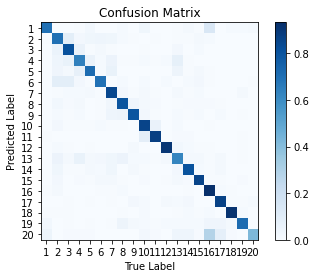

In [ ]:
testing(model, test, len(dataset.target_names), False)

#### Let's tune some parameters
Details are given [here](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

e.g.
```
model = RandomForestClassifier(max_depth=30) # max_depth=None by default (i.e. no limit)
# or
model = RandomForestClassifier(n_estimators=20) # n_estimators=10 by default
# or combine them
model = RandomForestClassifier(max_depth=30, n_estimators=20)
```

